In [136]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization & graphical plotting
import seaborn as sns
import tensorflow as tf           # to visualize random distributions
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,log_loss, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,log_loss, classification_report, confusion_matrix

pd.options.display.float_format = '{:.2f}'.format

import warnings                   # to deal with warning messages
warnings.filterwarnings('ignore')

In [137]:
data = pd.read_csv('heart_attack_prediction_dataset.csv')

In [138]:
df = data.copy()

In [139]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.00,0.00,no,0,0,195.00,106.00,70.00,26.97,80.00,77.00,No
1,Female,46,primaryschool,0,0.00,0.00,no,0,0,250.00,121.00,81.00,28.73,95.00,76.00,No
2,Male,48,uneducated,1,20.00,0.00,no,0,0,245.00,127.50,80.00,25.34,75.00,70.00,No
3,Female,61,graduate,1,30.00,0.00,no,1,0,225.00,150.00,95.00,28.58,65.00,103.00,yes
4,Female,46,graduate,1,23.00,0.00,no,0,0,285.00,130.00,84.00,23.10,85.00,85.00,No


In [140]:
df.shape

(4238, 16)

In [141]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [142]:
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.00,4238.00,4209.00,4185.00,4238.00,4238.00,4188.00,4238.00,4238.00,4219.00,4237.00,3850.00
mean,49.58,0.49,9.00,0.03,0.31,0.03,236.72,132.35,82.89,25.80,75.88,81.97
std,8.57,0.50,11.92,0.17,0.46,0.16,44.59,22.04,11.91,4.08,12.03,23.96
min,32.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00
50%,49.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00
75%,56.00,1.00,20.00,0.00,1.00,0.00,263.00,144.00,89.88,28.04,83.00,87.00
max,70.00,1.00,70.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00


In [143]:
pd.isna(df).sum()[pd.isna(df).sum() > 0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [145]:
## Now we proceed with our original plan to remove null values

## Null values in numerical variables

df.glucose.fillna(df.glucose.median(),inplace = True)
df.cigsPerDay.fillna(df.cigsPerDay.median(),inplace = True)
df.totChol.fillna(df.totChol.median(),inplace = True)
df.BMI.fillna(df.BMI.median(),inplace = True)
df.heartRate.fillna(df.heartRate.median(),inplace = True)

## Null values in categorical variables

df.education = df.education.fillna(df.education.mode().iloc[0])
df.BPMeds = df.BPMeds.fillna(df.BPMeds.mode().iloc[0])

## Check whether null values have been removed or not, after treating them

pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

all the null values are gone, and our dataframe is free from null values.


In [146]:
## Let's check the labels in categorical features

for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


Gender
['Male' 'Female']

education
['postgraduate' 'primaryschool' 'uneducated' 'graduate']

prevalentStroke
['no' 'yes']

Heart_ stroke
['No' 'yes']


In [147]:
## Let's rename the education feature labels, to keep them short in visuals

df.replace({'education' : {'postgraduate': 'pGrad', 'primaryschool': 'priSch', 'uneducated' : 'unEdu', 'graduate' : 'Grad'}}, inplace=True)

## Check the modificaiton made

df.education.unique()

array(['pGrad', 'priSch', 'unEdu', 'Grad'], dtype=object)

In [148]:
## Before proceeding to EDA, let's check the stastical description of th dataframe

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,4238,2,Female,2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4238.00,NaN,NaN,NaN,49.58,8.57,32.00,42.00,49.00,56.00,70.00
education,4238,4,unEdu,1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currentSmoker,4238.00,NaN,NaN,NaN,0.49,0.50,0.00,0.00,0.00,1.00,1.00
cigsPerDay,4238.00,NaN,NaN,NaN,8.94,11.90,0.00,0.00,0.00,20.00,70.00
BPMeds,4238.00,NaN,NaN,NaN,0.03,0.17,0.00,0.00,0.00,0.00,1.00
prevalentStroke,4238,2,no,4213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevalentHyp,4238.00,NaN,NaN,NaN,0.31,0.46,0.00,0.00,0.00,1.00,1.00
diabetes,4238.00,NaN,NaN,NaN,0.03,0.16,0.00,0.00,0.00,0.00,1.00
totChol,4238.00,NaN,NaN,NaN,236.69,44.33,107.00,206.00,234.00,262.00,696.00


# **Exploratory Data Analysis_EDA**

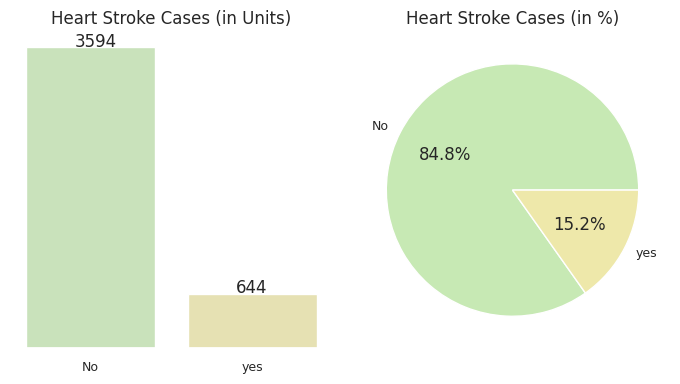

In [149]:
## Let's have a broader look at Heart Stroke, the target variable in our analysis

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':9,'ytick.labelsize':9, 'figure.autolayout':True})
my_col = ('#c7e9b4', '#EEE8AA')
plt.subplots(figsize=(7,4))

## Heart Stroke Cases (in Units)

plt.subplot(1,2,1)
plt.title('Heart Stroke Cases (in Units)', fontsize=12)
ax = sns.countplot(x="Heart_ stroke", data=df, palette=my_col, order=df['Heart_ stroke'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

## Heart Stroke Cases (in %)

plt.subplot(1,2,2)
plt.title('Heart Stroke Cases (in %)',fontsize=12)
df['Heart_ stroke'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

plt.show()


# **Observations**
*  The dataset appears to be imbalanced since the number of heart stroke cases is relatively much lower than the cases without heart stroke
*  In % terms, heart stroke cases account for just around 15% of total cases.



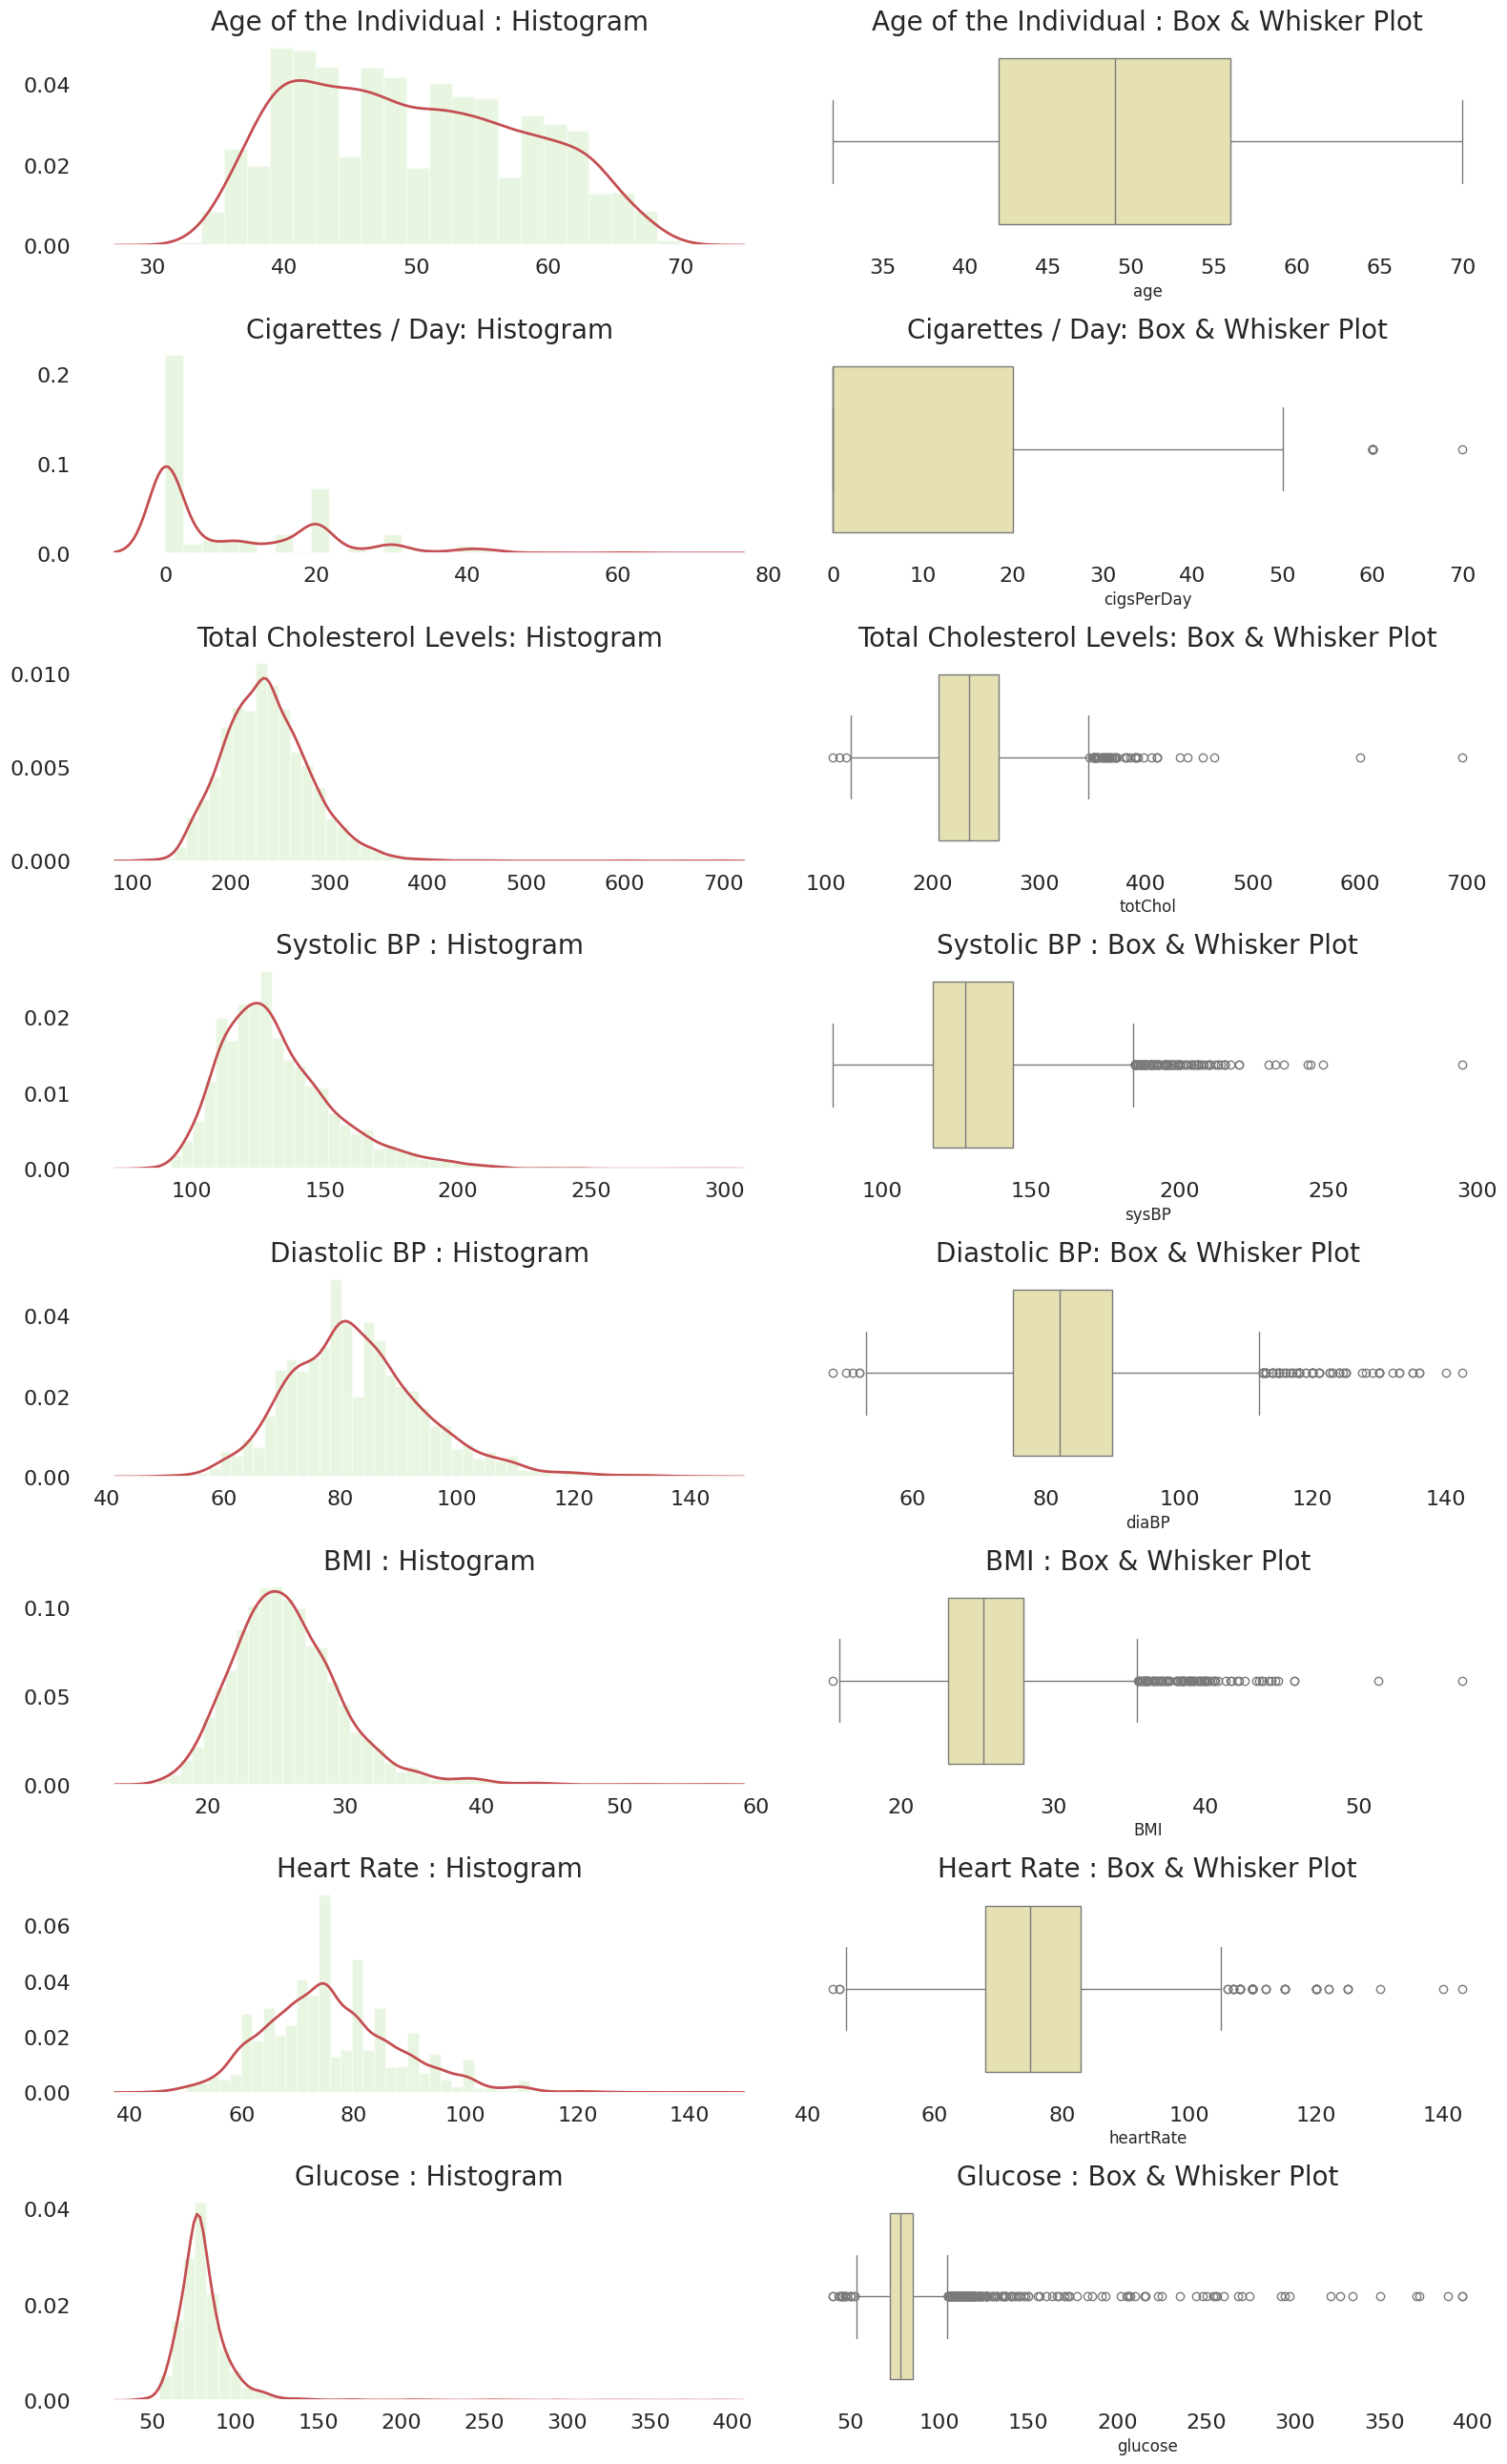

In [150]:
## Let's have a look at the distribtuion in numerical features through histograms and box-whisker plots

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':16,'ytick.labelsize':16, 'figure.autolayout':True})
plt.subplots(figsize=(16,26))

## Age of the Individual

plt.subplot(8,2,1)
plt.title('Age of the Individual : Histogram', fontsize=20)
sns.distplot(df.age, color='#c7e9b4', kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,2)
plt.title('Age of the Individual : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.age, orient="h", color='#EEE8AA')
plt.yticks([])

## Cigarettes / Day

plt.subplot(8,2,3)
plt.title('Cigarettes / Day: Histogram', fontsize=20)
sns.distplot(df.cigsPerDay, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,4)
plt.title('Cigarettes / Day: Box & Whisker Plot', fontsize=20)
sns.boxplot(df.cigsPerDay, orient="h", color="#EEE8AA")
plt.yticks([])

## Cholesterol Levels

plt.subplot(8,2,5)
plt.title('Total Cholesterol Levels: Histogram', fontsize=20)
sns.distplot(df.totChol, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,6)
plt.title('Total Cholesterol Levels: Box & Whisker Plot', fontsize=20)
sns.boxplot(df.totChol, orient="h", color="#EEE8AA")
plt.yticks([])

## Systolic Blood Pressure

plt.subplot(8,2,7)
plt.title('Systolic BP : Histogram', fontsize=20)
sns.distplot(df.sysBP, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,8)
plt.title('Systolic BP : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.sysBP, orient="h", color="#EEE8AA")
plt.yticks([])

## Diastolic Blood Pressure

plt.subplot(8,2,9)
plt.title('Diastolic BP : Histogram', fontsize=20)
sns.distplot(df.diaBP, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,10)
plt.title('Diastolic BP: Box & Whisker Plot', fontsize=20)
sns.boxplot(df.diaBP, orient="h", color="#EEE8AA")
plt.yticks([])

## BMI

plt.subplot(8,2,11)
plt.title('BMI : Histogram', fontsize=20)
sns.distplot(df.BMI, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,12)
plt.title('BMI : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.BMI, orient="h", color="#EEE8AA")
plt.yticks([])

## Heart Rate

plt.subplot(8,2,13)
plt.title('Heart Rate : Histogram', fontsize=20)
sns.distplot(df.heartRate, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,14)
plt.title('Heart Rate : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.heartRate, orient="h", color="#EEE8AA")
plt.yticks([])

## Glucose

plt.subplot(8,2,15)
plt.title('Glucose : Histogram', fontsize=20)
sns.distplot(df.glucose, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,16)
plt.title('Glucose : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.glucose, orient="h", color="#EEE8AA");
plt.yticks([])

plt.show()


# **Some Observations**

*   Like in a typical patient health records dataset, we can see several (in fact, almost all the) features with outliers. Let's retain the outliers as-is, assuming that they are real values of some patients.

*   Glucose, Total Cholesterol, Systolic BP, and BMI features have most number of outliers.

*   Total Cholesterol, BMI and Glucose features have bell shape (normal) distribution.







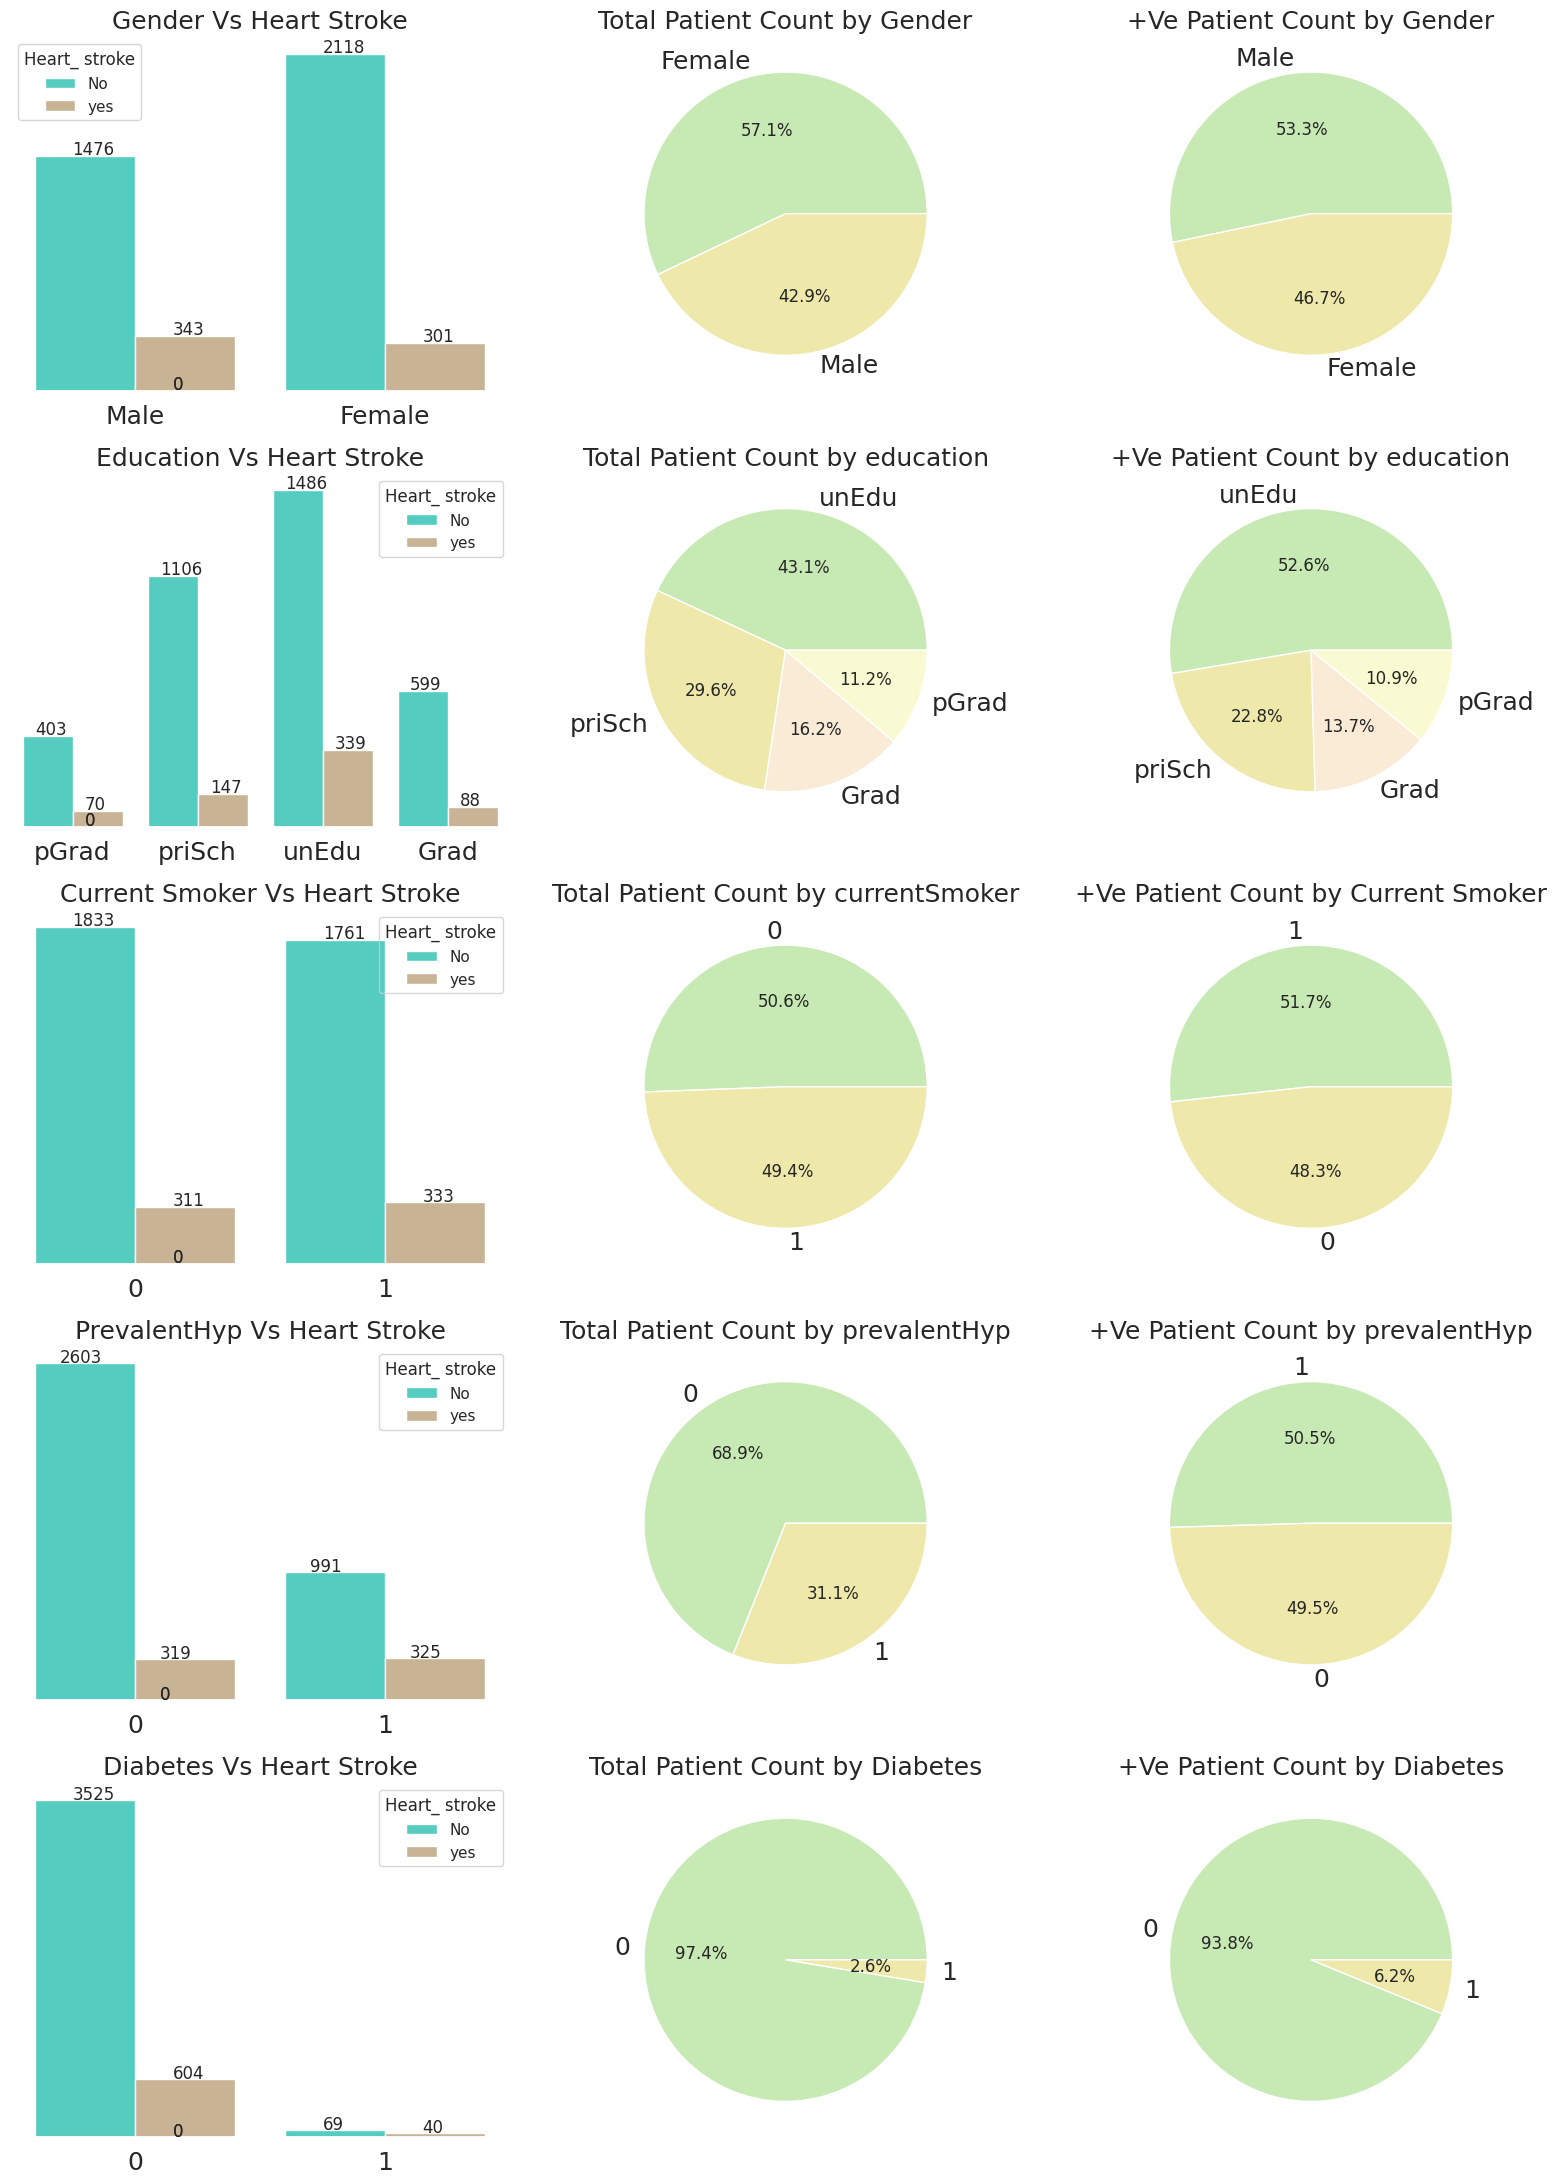

In [151]:
## Now let's do some analysis on categorical variables and their impact on Heart Stroke

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':18,'ytick.labelsize':18, 'figure.autolayout':True})
my_col = ('#40E0D0', '#D2B48C')
my_pal = ('#c7e9b4', '#EEE8AA', '#FAEBD7', '#FAFAD2','#F08080', '#F4A460')
plt.subplots(figsize=(16,26))

##  Gender

plt.subplot(6,3,1)
plt.title('Gender Vs Heart Stroke',fontsize=18)
ax = sns.countplot(x='Gender', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,2)
plt.title('Total Patient Count by Gender', fontsize=18)
df['Gender'].value_counts().plot(kind='pie', subplots=True, colors =my_pal, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(6,3,3)
plt.title('+Ve Patient Count by Gender', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['Gender'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## education

plt.subplot(6,3,4)
plt.title('Education Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='education', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,5)
plt.title('Total Patient Count by education', fontsize=18)
df['education'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%'),
plt.subplot(6,3,6)
plt.title('+Ve Patient Count by education', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['education'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## Current Smoker

plt.subplot(6,3,7)
plt.title('Current Smoker Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='currentSmoker', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,8)
plt.title('Total Patient Count by currentSmoker', fontsize=18)
df['currentSmoker'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(6,3,9)
plt.title('+Ve Patient Count by Current Smoker', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['currentSmoker'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## Hypertension

plt.subplot(6,3,10)
plt.title('PrevalentHyp Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='prevalentHyp', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,11)
plt.title('Total Patient Count by prevalentHyp', fontsize=18)
df['prevalentHyp'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(6,3,12)
plt.title('+Ve Patient Count by prevalentHyp', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['prevalentHyp'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## diabetes

plt.subplot(6,3,13)
plt.title('Diabetes Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='diabetes', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,14)
plt.title('Total Patient Count by Diabetes', fontsize=18)
df['diabetes'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(6,3,15)
plt.title('+Ve Patient Count by Diabetes', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['diabetes'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

plt.show()

# **Some Observations**

*   Total patient count by gender is higher for female patients (at about 56% share).

*   Whereas positive (+ve) patient count is higher for male patients (at about 52% share)

*   By education, positive patient count is higher for uneducated patient group.






# **Model Building & Machine Learning**

In [152]:
##label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()

#select ctegorical columns
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

#joining the data to the numeric data
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)
main_df.head(5)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender,education,prevalentStroke,Heart_ stroke
0,39,0,0.00,0.00,0,0,195.00,106.00,70.00,26.97,80.00,77.00,1,1,0,0
1,46,0,0.00,0.00,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0,2,0,0
2,48,1,20.00,0.00,0,0,245.00,127.50,80.00,25.34,75.00,70.00,1,3,0,0
3,61,1,30.00,0.00,1,0,225.00,150.00,95.00,28.58,65.00,103.00,0,0,0,1
4,46,1,23.00,0.00,0,0,285.00,130.00,84.00,23.10,85.00,85.00,0,0,0,0


##Scaling the Data
For features with normal distribution, we use Standardisation with StandardScaler. For features with skewed distribution, we use Normalisation with MinMaxscaler. So first we'll have a glance at skewness of features before proceeding with scaling

In [153]:
main_df.skew(axis = 0)

age                0.23
currentSmoker      0.02
cigsPerDay         1.26
BPMeds             5.59
prevalentHyp       0.82
diabetes           5.99
totChol            0.88
sysBP              1.15
diaBP              0.71
BMI                0.99
heartRate          0.64
glucose            6.54
Gender             0.29
education         -0.74
prevalentStroke   12.91
Heart_ stroke      1.94
dtype: float64

In [154]:
## Now we continue with scaling process

stdsca = StandardScaler() # Standardization
minmaxsca = MinMaxScaler() # Normalization

main_df['age'] = stdsca.fit_transform(main_df[['age']])
main_df['prevalentHyp'] = stdsca.fit_transform(main_df[['prevalentHyp']])
main_df['totChol'] = stdsca.fit_transform(main_df[['totChol']])
main_df['diaBP'] = stdsca.fit_transform(main_df[['diaBP']])
main_df['BMI'] = stdsca.fit_transform(main_df[['BMI']])
main_df['heartRate'] = stdsca.fit_transform(main_df[['heartRate']])

main_df['cigsPerDay'] = minmaxsca.fit_transform(main_df[['cigsPerDay']])
main_df['BPMeds'] = minmaxsca.fit_transform(main_df[['BPMeds']])
main_df['diabetes'] = minmaxsca.fit_transform(main_df[['diabetes']])
main_df['sysBP'] = minmaxsca.fit_transform(main_df[['sysBP']])
main_df['glucose'] = minmaxsca.fit_transform(main_df[['glucose']])
main_df['prevalentStroke'] = minmaxsca.fit_transform(main_df[['prevalentStroke']])

main_df.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender,education,prevalentStroke,Heart_ stroke
0,-1.23,0,0.00,0.00,-0.67,0.00,-0.94,0.11,-1.08,0.29,0.34,0.10,1,1,0.00,0
1,-0.42,0,0.00,0.00,-0.67,0.00,0.30,0.18,-0.16,0.72,1.59,0.10,0,2,0.00,0
2,-0.18,1,0.29,0.00,-0.67,0.00,0.19,0.21,-0.24,-0.11,-0.07,0.08,1,3,0.00,0
3,1.33,1,0.43,0.00,1.49,0.00,-0.26,0.31,1.02,0.68,-0.90,0.18,0,0,0.00,1
4,-0.42,1,0.33,0.00,-0.67,0.00,1.09,0.22,0.09,-0.66,0.76,0.13,0,0,0.00,0


In [155]:
## Now we check the corrleation of features with the target variable (Heart Stroke)

corr_matrix = main_df.corr()
corr_matrix['Heart_ stroke'].sort_values(ascending=False)

Heart_ stroke     1.00
age               0.23
sysBP             0.22
prevalentHyp      0.18
diaBP             0.15
glucose           0.12
diabetes          0.10
Gender            0.09
BPMeds            0.09
totChol           0.08
BMI               0.07
prevalentStroke   0.06
cigsPerDay        0.06
education         0.06
heartRate         0.02
currentSmoker     0.02
Name: Heart_ stroke, dtype: float64

**You can see that age, systolic BP, hypertension prevalence and diastolic BP have higher correlation with heart stroke, compared to other features**

In [156]:
## Segregating the Dependent Variable in Y-axis and Independent Variables in X-axis
## Besigdes segregating X & Y-axis variables, we'll remove some insignificant features too.

X = main_df.drop(columns=["Heart_ stroke", "currentSmoker", "heartRate", "education", "cigsPerDay", "prevalentStroke"])
y = main_df["Heart_ stroke"]

## Scaling the data

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [157]:
# prompt: Use gridsearch cv to find best parameters of models  Logistic Regression ,Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbors. print best accuracy and hyperparameneters for best accuracy  for each model

# Define the models and their parameters
models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "param_grid": {"C": [0.1,0.2,0.3,0.4,0.5], "penalty": ["l1", "l2"]},
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(class_weight='balanced'),
        "param_grid": {"criterion": ["gini", "entropy"], "max_depth": [3, 5, 7,8,9,10,20],'min_samples_leaf': [120]},
    },
    "Random Forest": {
        "model": RandomForestClassifier(class_weight='balanced'),
        "param_grid": {"n_estimators": [10, ], "max_depth": [3, 5, 7,10,20,40,60,100],'min_samples_leaf': [120]},
    },
    "Support Vector Machine": {
        "model": SVC(),
        "param_grid": {"kernel": ["linear", "rbf"], "C": [0.1,0.2,0.3]},
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "param_grid": {"n_neighbors": [5, 7, 9,10,15,20]},
    },
}
# Initialize an empty dictionary to store the evaluation metrics for each model.
evaluation_metrics = {}

# Loop through each model and perform grid search cross-validation.
for model_name, model_config in models.items():
    model = model_config["model"]
    param_grid = model_config["param_grid"]

    grid_search = GridSearchCV(model, param_grid, cv=2)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Store the evaluation metrics
    evaluation_metrics[model_name] = {"precision": precision, "recall": recall, "f1_score": f1, "accuracy": accuracy}
    print(f"Evaluation metrics for {model_name}: Best Params: {best_params}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")


Evaluation metrics for Logistic Regression: Best Params: {'C': 0.1, 'penalty': 'l2'}, Accuracy: 0.8549528301886793, Precision: 0.8402644556287803, Recall: 0.8549528301886793, F1-score: 0.8002304437453934
Evaluation metrics for Decision Tree: Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 120}, Accuracy: 0.6356132075471698, Precision: 0.8018874752025308, Recall: 0.6356132075471698, F1-score: 0.6862500815176256
Evaluation metrics for Random Forest: Best Params: {'max_depth': 5, 'min_samples_leaf': 120, 'n_estimators': 10}, Accuracy: 0.5908018867924528, Precision: 0.8087942463891785, Recall: 0.5908018867924528, F1-score: 0.6481561636721853
Evaluation metrics for Support Vector Machine: Best Params: {'C': 0.1, 'kernel': 'linear'}, Accuracy: 0.847877358490566, Precision: 0.7188960150409398, Recall: 0.847877358490566, F1-score: 0.7780776270002769
Evaluation metrics for K-Nearest Neighbors: Best Params: {'n_neighbors': 15}, Accuracy: 0.8408018867924528, Precision: 0.77

In [158]:
## Splitting the Data

## We split the data into train & test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

print('='*34, '\n', f'\033[94mTrain data & Test data shapes', '\n', f'\033[94m '*14, f'\033[94mX            y')
print('='*34, '\n', f'\033[94mTrain data | ', X_train.shape, y_train.shape, '\n', f'\033[94mTest data  | ', X_test.shape, y_test.shape)

 Train data & Test data shapes 
                X            y
 Train data |  (3390, 10) (3390,) 
 Test data  |  (848, 10) (848,)


In [159]:
## Defining & running the Classifier Models

classifiers = [
    KNeighborsClassifier(n_neighbors=15),
    SVC(kernel="linear", C=0.1, probability=True),
    DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=120),
    RandomForestClassifier(max_depth=20, min_samples_leaf=120, n_estimators=10),
    LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
]

# Logging for Visual Comparison

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print(f'\033[94m='*30, '\n')
    print(name, '\n')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.5%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {:.5}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

print(f'\033[94m='*30)


KNeighborsClassifier 

Accuracy: 84.08019%
Log Loss: 0.88032

SVC 

Accuracy: 84.78774%
Log Loss: 0.41759

DecisionTreeClassifier 

Accuracy: 83.72642%
Log Loss: 0.41055

RandomForestClassifier 

Accuracy: 84.78774%
Log Loss: 0.3997

LogisticRegression 

Accuracy: 85.49528%
Log Loss: 0.39226


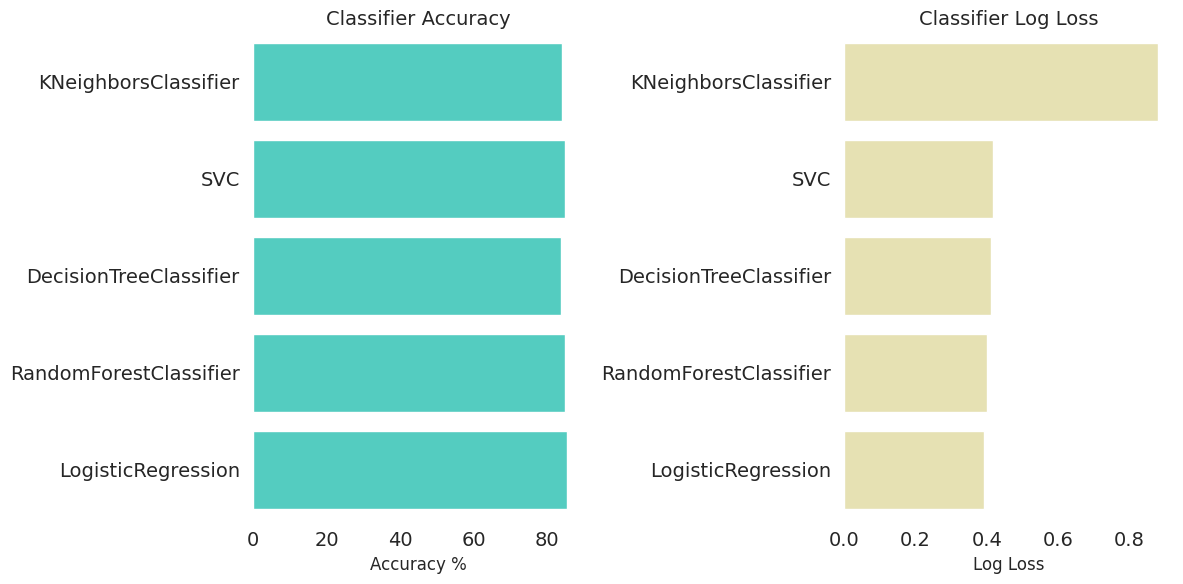

In [160]:
## Visualising the data with bar charts

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(12,6))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="turquoise")
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy', fontsize=14)
plt.ylabel(None)

plt.subplot(1,2,2)
sns.set_color_codes("bright")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="palegoldenrod")
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss', fontsize=14)
plt.ylabel(None)

plt.show()

# **Key Observations**
Based on the accuracy and log loss data information we have obtained from our analysis, it can be concluded that **LogisticRegression**, **RandomForestClassifier**, and **SVC** have better accuracy and Log Loss combination than other models.

# **Keras sqequential model**

Epoch 1/50
17/17 [==============================] - 1s 15ms/step - loss: 0.6454 - accuracy: 0.6805 - val_loss: 0.6585 - val_accuracy: 0.7028
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6214 - accuracy: 0.7357 - val_loss: 0.6353 - val_accuracy: 0.7630
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5990 - accuracy: 0.7755 - val_loss: 0.6125 - val_accuracy: 0.7854
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5781 - accuracy: 0.7947 - val_loss: 0.5912 - val_accuracy: 0.8007
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5584 - accuracy: 0.8094 - val_loss: 0.5707 - val_accuracy: 0.8137
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5396 - accuracy: 0.8198 - val_loss: 0.5515 - val_accuracy: 0.8231
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5218 - accuracy: 0.8289 - val_loss: 0.5333 - val_accuracy: 0.8314
Epoch 8/50
17/17 [=

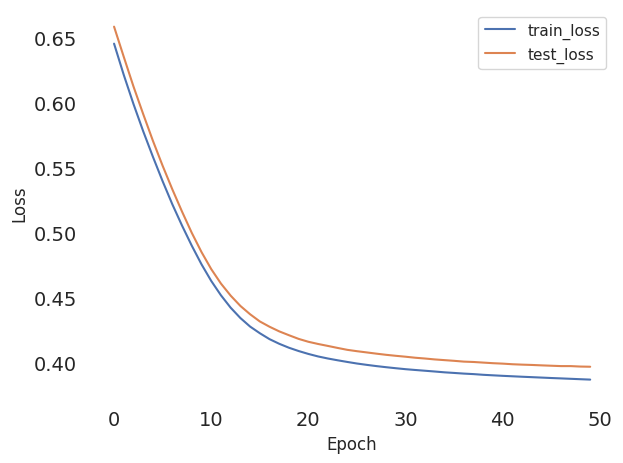

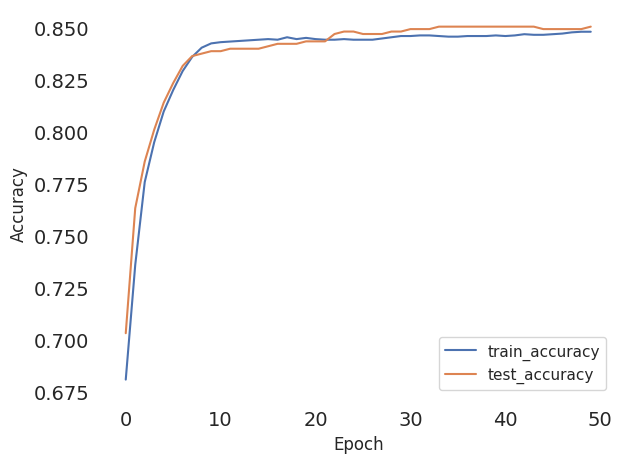

In [161]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=200, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)

print('Evaluation result:')
print('Loss:', loss)
print('Accuracy:', accuracy)

# Plot learning curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **CNN**

In [162]:
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1            # each feature is represented by 1 number
X_train_reshaped = X_train.reshape(sample_size,time_steps,input_dimension)

In [163]:
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1            # each feature is represented by 1 number
X_train_reshaped = X_train.reshape(sample_size,time_steps,input_dimension)

In [164]:
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

Epoch 1/25
9/9 [==============================] - 1s 46ms/step - loss: 0.5821 - accuracy: 0.8139 - val_loss: 0.4828 - val_accuracy: 0.8479
Epoch 2/25
9/9 [==============================] - 0s 25ms/step - loss: 0.4547 - accuracy: 0.8481 - val_loss: 0.4397 - val_accuracy: 0.8479
Epoch 3/25
9/9 [==============================] - 0s 24ms/step - loss: 0.4163 - accuracy: 0.8481 - val_loss: 0.4227 - val_accuracy: 0.8479
Epoch 4/25
9/9 [==============================] - 0s 24ms/step - loss: 0.4082 - accuracy: 0.8481 - val_loss: 0.4178 - val_accuracy: 0.8479
Epoch 5/25
9/9 [==============================] - 0s 26ms/step - loss: 0.4022 - accuracy: 0.8481 - val_loss: 0.4109 - val_accuracy: 0.8479
Epoch 6/25
9/9 [==============================] - 0s 42ms/step - loss: 0.3970 - accuracy: 0.8478 - val_loss: 0.4072 - val_accuracy: 0.8479
Epoch 7/25
9/9 [==============================] - 0s 44ms/step - loss: 0.3934 - accuracy: 0.8490 - val_loss: 0.4046 - val_accuracy: 0.8502
Epoch 8/25
9/9 [===========

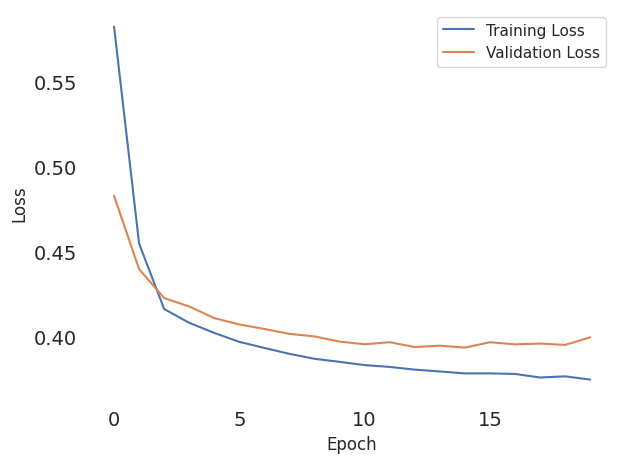

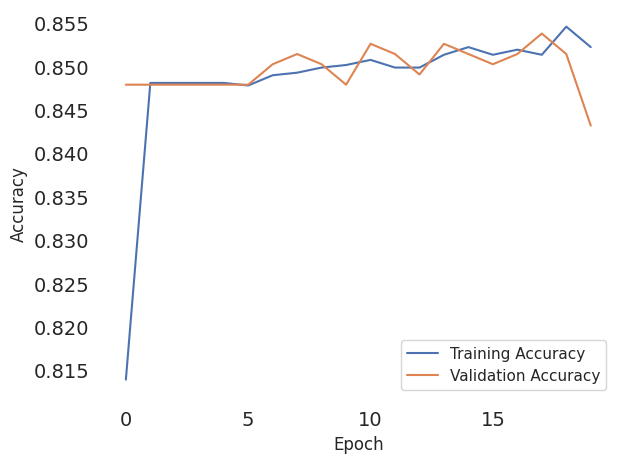

In [165]:
model_cnn = tf.keras.Sequential()

model_cnn.add(tf.keras.layers.Conv1D(filters=100, kernel_size=2, padding='same', activation='relu', input_shape=(time_steps, input_dimension)))
model_cnn.add(tf.keras.layers.MaxPool1D(pool_size=2))

model_cnn.add(tf.keras.layers.Conv1D(filters=100, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(tf.keras.layers.MaxPool1D(pool_size=2))

model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(6, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_cnn = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history_cnn = model_cnn.fit(X_train_reshaped, y_train, batch_size=400, epochs=25, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping_cnn])

print(f'Loss: {loss:.5f}')
print(f'Accuracy: {accuracy:.5f}')


# Plot the training and validation loss
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Heart_ stroke     1.00
age               0.23
sysBP             0.22
prevalentHyp      0.18
diaBP             0.15
glucose           0.12
diabetes          0.10
Gender            0.09
BPMeds            0.09
totChol           0.08
BMI               0.07
prevalentStroke   0.06
cigsPerDay        0.06
education         0.06
heartRate         0.02
currentSmoker     0.02
Name: Heart_ stroke, dtype: float64
KNeighborsClassifier

Accuracy: 84.08019%
Log Loss: 0.88032
AUC: 0.64157
F1 Score: 0.09396
Precision: 0.35000
Recall: 0.05426
SVC

Accuracy: 84.78774%
Log Loss: 0.41789
AUC: 0.63267
F1 Score: 0.00000
Precision: 0.00000
Recall: 0.00000
DecisionTreeClassifier

Accuracy: 83.72642%
Log Loss: 0.41055
AUC: 0.66411
F1 Score: 0.11538
Precision: 0.33333
Recall: 0.06977
RandomForestClassifier

Accuracy: 84.78774%
Log Loss: 0.39851
AUC: 0.68677
F1 Score: 0.00000
Precision: 0.00000
Recall: 0.00000
LogisticRegression

Accuracy: 85.49528%
Log Loss: 0.39226
AUC: 0.70385
F1 Score: 0.12766
Precision: 0.750

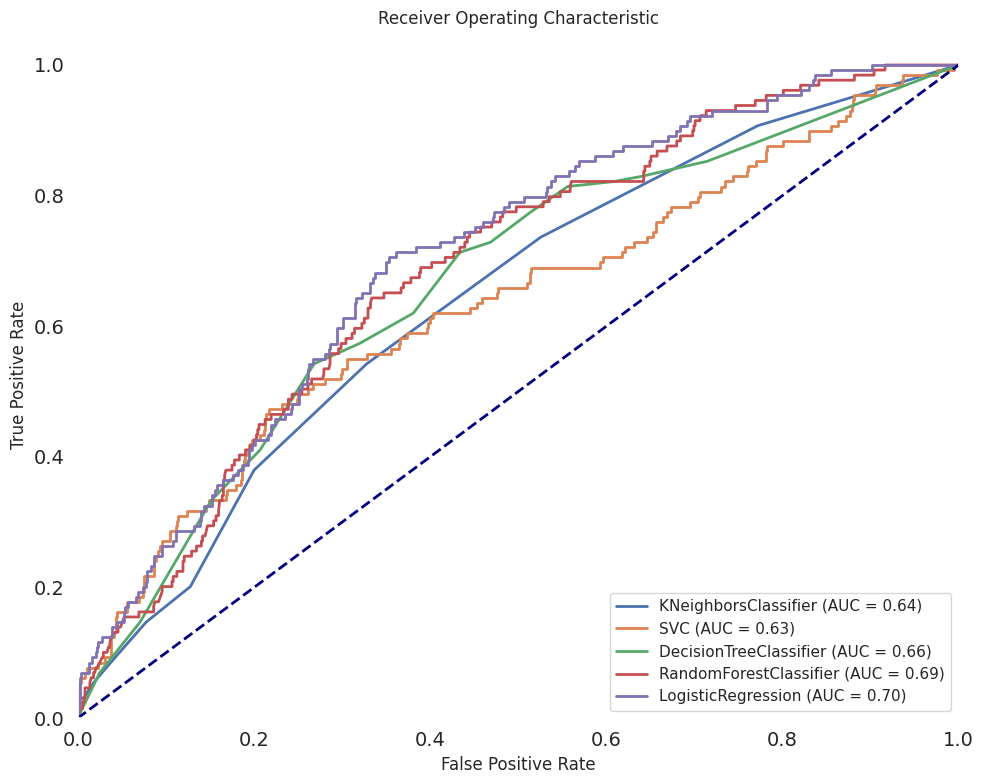

               Classifier  Accuracy  Log Loss  AUC  F1 Score  Precision  \
0    KNeighborsClassifier     84.08      0.88 0.64      0.09       0.35   
1                     SVC     84.79      0.42 0.63      0.00       0.00   
2  DecisionTreeClassifier     83.73      0.41 0.66      0.12       0.33   
3  RandomForestClassifier     84.79      0.40 0.69      0.00       0.00   
4      LogisticRegression     85.50      0.39 0.70      0.13       0.75   

   Recall  
0    0.05  
1    0.00  
2    0.07  
3    0.00  
4    0.07  


In [167]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, log_loss, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Label encoding
le = LabelEncoder()

# Select categorical columns and apply label encoding
cat_df = df.select_dtypes(exclude=["int", "float"])
for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

# Join the encoded categorical data with the numeric data
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

# Scaling process
stdsca = StandardScaler()  # Standardization
minmaxsca = MinMaxScaler()  # Normalization

columns_to_standardize = ['age', 'prevalentHyp', 'totChol', 'diaBP', 'BMI', 'heartRate']
columns_to_normalize = ['cigsPerDay', 'BPMeds', 'diabetes', 'sysBP', 'glucose', 'prevalentStroke']

for col in columns_to_standardize:
    main_df[col] = stdsca.fit_transform(main_df[[col]])

for col in columns_to_normalize:
    main_df[col] = minmaxsca.fit_transform(main_df[[col]])

# Check the correlation of features with the target variable (Heart Stroke)
corr_matrix = main_df.corr()
print(corr_matrix['Heart_ stroke'].sort_values(ascending=False))

# Segregating the Dependent Variable (y) and Independent Variables (X)
X = main_df.drop(columns=["Heart_ stroke", "currentSmoker", "heartRate", "education", "cigsPerDay", "prevalentStroke"])
y = main_df["Heart_ stroke"]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

# Defining & running the classifier models
classifiers = [
    KNeighborsClassifier(n_neighbors=15),
    SVC(kernel="linear", C=0.1, probability=True),
    DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=120),
    RandomForestClassifier(max_depth=20, min_samples_leaf=120, n_estimators=10),
    LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
]

# Logging for visual comparison
log_cols = ["Classifier", "Accuracy", "Log Loss", "AUC", "F1 Score", "Precision", "Recall"]
log = pd.DataFrame(columns=log_cols)

plt.figure(figsize=(10, 8))

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print(f'\033[94m{"="*30}\n{name}\n')

    # Accuracy
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print(f"Accuracy: {acc:.5%}")

    # Log Loss
    train_predictions_proba = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions_proba)
    print(f"Log Loss: {ll:.5f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, train_predictions_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.5f}")

    # F1 Score
    f1 = f1_score(y_test, train_predictions)
    print(f"F1 Score: {f1:.5f}")

    # Precision Score
    precision = precision_score(y_test, train_predictions)
    print(f"Precision: {precision:.5f}")

    # Recall Score
    recall = recall_score(y_test, train_predictions)
    print(f"Recall: {recall:.5f}")

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Logging
    log_entry = pd.DataFrame([[name, acc * 100, ll, roc_auc, f1, precision, recall]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(log)

# **Conclusion:**
LogisticRegression is likely the best overall model based on these metrics. It has Accuracy= 85.50, Log Loss= 0.39, AUC= 0.70, F1 Score= 0.13, Precision =0.75 , Recall = 0.07.

Therefore, LogisticRegression is the most reliable classifier for your dataset based on this comprehensive analysis.



In [179]:
# prompt: building a predictive system using LogisticRegression and use my input

# Import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define the input data
input_data = (50, 0, 130, 80, 33.3, 80, 70, 0, 0, 130)

# Convert input data to NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
scaler = StandardScaler()
scaler.fit(input_data_reshaped)
input_data_scaled = scaler.transform(input_data_reshaped)

# Load the trained LogisticRegression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions using the LogisticRegression model
prediction = logreg.predict(input_data_scaled)

# Interpret the prediction
if prediction[0] == 0:
    print("The person is not likely to have a heart stroke.")
else:
    print("The person is likely to have a heart stroke.")


The person is not likely to have a heart stroke.


Inputs

1. age
2. prevalentHyp
3. totChol
4. [diaBP](https://)
5. BMI
6. heartRate
7. glucose
8. BPMeds
9. diabetes
10. sysBP

In [181]:
import pickle
pickle.dump(logreg, open('model.pkl', 'wb'))